In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<img src = "Sources/switzerland-2361939_1280.jpg" width = "550" Height = "300">
<h3>PROBLEM STATEMENT:</h3>
<p>How effectively can borrower-level financial attributes be used to estimate the probability of default (PD) in a credit risk setting, and what challenges arise when modeling rare default events using logistic regression?</p>

<h3>Generating Data base on simple Assumptions</h3>

In [97]:
np.random.seed(42)
n = 1000

df = pd.DataFrame({
    'loan_amt' : np.random.normal(50000,15000,n),
    'Income' : np.random.normal(70000,20000,n),
    'Credit_Score' : np.random.normal(650,50,n),
    'Age' : np.random.randint(21,65,n),
    'Default' : np.random.binomial(1,0.1,n)
})

<h3>Spliting Data into it's Features</h3>

In [98]:
x = df[['loan_amt','Income','Credit_Score','Age']]
y = df['Default']

<b>Splitting Data into 70% Training and 30% Test</b>

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3, random_state=0)

In [114]:
model = LogisticRegression()
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

<h4>Model Prediction</h4>

In [32]:
y_prob = model.predict_proba(x_test)[:,1] # y is the default; This syntax predicts the probability of default
y_pred = model.predict(x_test) # Predicts the binary outcome (0,1)

<b>Evaluating the Model</b>

In [33]:
print(classification_report(y_test,y_pred))
print("AUC score ", roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       281
           1       0.00      0.00      0.00        19

    accuracy                           0.94       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.88      0.94      0.91       300

AUC score  0.4300430792283199


C:\Users\tarun\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tarun\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tarun\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

<b>Ploting Roc Curve</b>

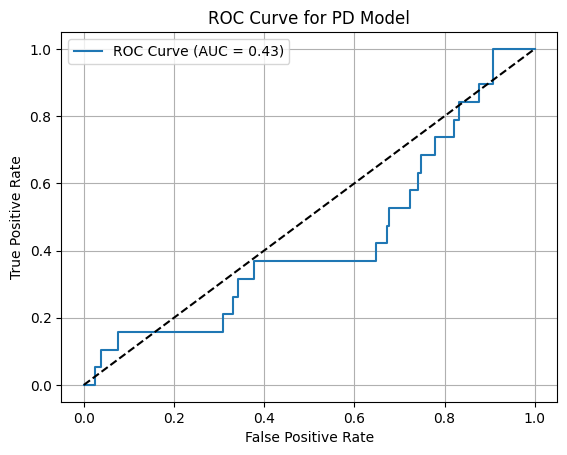

In [34]:
# Step 7: Plot ROC Curve (Receiver Operating Characteristic)
fpr, tpr, _ = roc_curve(y_test, y_prob)                  # Get False Positive Rate and True Positive Rate
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')                           # Plot a diagonal reference line
plt.xlabel("False Positive Rate")                         # X-axis label
plt.ylabel("True Positive Rate")                          # Y-axis label
plt.title("ROC Curve for PD Model")                       # Title of the graph
plt.legend()                                              # Show legend
plt.grid(True)                                            # Add gridlines
plt.show()                                                # Display the plot